In [97]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from leia import SentimentIntensityAnalyzer
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import unicodedata
import re
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from PortugueseLemmatizer import PortugueseMess
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.lines import Line2D

nltk.download('vader_lexicon')
nltk.download('rslp')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yonix42\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\yonix42\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yonix42\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yonix42\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
ativo = "AMER3"
dados = pd.read_csv(f"./{ativo}.csv")

In [99]:

def combinar_paragrafos(texto_lista):
    texto = ' '.join(texto_lista.strip("[]").replace("'", "").split(", "))
    texto = texto.lower()
    return texto

def remove_stop_words(texto):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    retorno = []
    for p in texto:
        if p not in stopwords:
            retorno.append(p)
    return retorno

def remove_pontuacao(texto):
    retorno = []
    for token in texto:
        token = re.sub(r'[^a-zA-Z0-9\s]', '', token)
        token = unicodedata.normalize('NFD', token).encode('ascii', 'ignore').decode('utf-8')
        retorno.append(token)
    retorno = list(filter(None, retorno))
    return retorno

def tokenizacao_lemmatizer(texto):
    tokens = word_tokenize(texto)
    palavras_lemmatizadas = [PortugueseMess(w) for w in tokens]
    return palavras_lemmatizadas

def analisar_sentimento(texto):
    analisador = SentimentIntensityAnalyzer()
    
    if type(texto) == list:
        texto = " ".join(texto)
    return analisador.polarity_scores(texto)['compound'] 

def retornar_sentimento(sentimento):
    if sentimento >= 0.05:
        return 'positivo'
    elif sentimento <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

In [100]:
pd.options.display.max_colwidth = 50

dados['texto'] = dados['texto'].apply(combinar_paragrafos)
dados['sent_proc_cru'] = dados['texto'].apply(analisar_sentimento)

dados['proc_1'] = dados['texto'].apply(tokenizacao_lemmatizer)
dados['proc_2'] = dados['proc_1'].apply(remove_stop_words)
dados['proc_3'] = dados['proc_2'].apply(remove_pontuacao)
dados['sent_proc_3'] = dados['proc_3'].apply(analisar_sentimento)

dados['sent_cru_texto'] = dados['sent_proc_cru'].apply(retornar_sentimento)
dados['sent_proc_3_texto'] = dados['sent_proc_3'].apply(retornar_sentimento)
dados['texto'].head()

0    o executivo sergio rial que renunciou à presid...
1    por jessica bahia melo investing.com – os merc...
2    investing.com — o ibovespa subia 0,49% às 10h2...
3    por andre romani e carolina pulice são paulo (...
4    um site que reúne acionistas que se sentiram l...
Name: texto, dtype: object

In [101]:
dados['sent_cru_texto']

0      negativo
1      positivo
2      negativo
3      negativo
4      negativo
         ...   
145    positivo
146    positivo
147    negativo
148    negativo
149    negativo
Name: sent_cru_texto, Length: 150, dtype: object

In [102]:
def plotar_analise(df):
    negativos_pre = df['sent_cru_texto'].tolist().count('negativo')
    neutros_pre = df['sent_cru_texto'].tolist().count('neutro')
    positivos_pre = df['sent_cru_texto'].tolist().count('positivo')

    negativos_pos = df['sent_proc_3_texto'].tolist().count('negativo')
    neutros_pos = df['sent_proc_3_texto'].tolist().count('neutro')
    positivos_pos = df['sent_proc_3_texto'].tolist().count('positivo')

    sentimentos = ['Negativo', 'Neutro', 'Positivo']

    quantidades_pre = [negativos_pre, neutros_pre, positivos_pre]
    quantidades_pos = [negativos_pos, neutros_pos, positivos_pos]

    largura = 0.35

    x = range(len(sentimentos))

    fig, ax = plt.subplots()

    ax.bar([i - largura/2 for i in x], quantidades_pre, largura, label='pré')
    ax.bar([i + largura/2 for i in x], quantidades_pos, largura, label='pós')

    ax.set_xlabel('Sentimento')
    ax.set_ylabel('Quantidade')
    ax.set_title(f'Comparação da analise de sentimentos pré e pós, {ativo}')

    ax.set_xticks(x)
    ax.set_xticklabels(sentimentos)

    ax.legend()

    for i, v1, v2 in zip(x, quantidades_pre, quantidades_pos):
        plt.text(i - largura/2, v1, str(v1), ha='center', va='bottom')
        plt.text(i + largura/2, v2, str(v2), ha='center', va='bottom')

    plt.show()

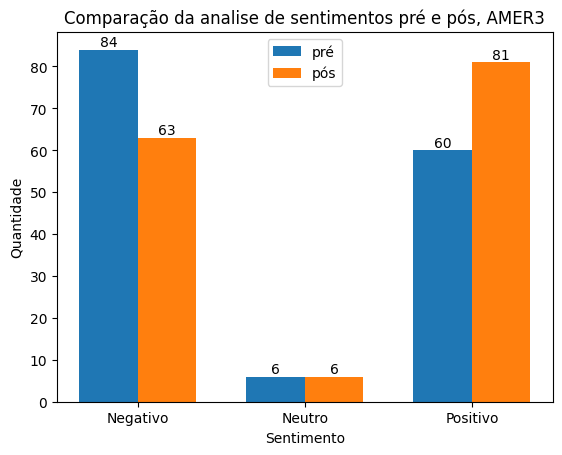

In [103]:
plotar_analise(dados)

In [104]:
pd.options.display.max_colwidth = 150

print(dados[['url', 'sent_proc_3_texto']])

                                                                                                                                                       url   
0     https://br.investing.com/news/stock-market-news/americanas-expresidente-sergio-rial-e-o-1o-acusado-em-processo-na-cvm-sobre-rombo-bilionario-1119994  \
1                              https://br.investing.com/news/stock-market-news/abertura-de-mercado-o-que-esperar-do-ibovespa-e-dolar-nesta-3afeira-1120103   
2                      https://br.investing.com/news/stock-market-news/acoes-locaweb-petz-e-meliuz-registram-maiores-altas-do-ibovespa-indice-sobe-1120146   
3    https://br.investing.com/news/stock-market-news/instituto-de-acionistas-minoritarios-abre-queixa-contra-americanas-apos-ter-site-tirado-do-ar-1120620   
4    https://br.investing.com/news/stock-market-news/site-de-acionistas-que-se-sentiram-lesados-por-americanas-e-derrubado-varejista-corrigira-erro-112...   
..                                                  

In [105]:
pd.options.display.max_colwidth = 25

dados.head()

,Unnamed: 0,data_hora,url,titulo,texto,aberturaDiaAnterior,fechamentoDiaAnterior,aberturaDiaAtual,fechamentoDiaAtual,aberturaDiaSeguinte,fechamentoDiaSeguinte,abertura2Dias,fechamento2Dias,sent_proc_cru,proc_1,proc_2,proc_3,sent_proc_3,sent_cru_texto,sent_proc_3_texto
0,149,2023-06-06 05:00:00,https://br.investing....,Americanas: ex-presid...,o executivo sergio ri...,1.11,1.10,1.10,1.11,1.12,1.09,1.1,1.09,-0.3400,"[o, execu, sergi, ria...","[execu, sergi, rial, ...","[execu, sergi, rial, ...",-0.7717,negativo,negativo
1,148,2023-06-06 09:15:00,https://br.investing....,Abertura de mercado: ...,por jessica bahia mel...,1.11,1.10,1.10,1.11,1.12,1.09,1.1,1.09,0.3400,"[por, jess, bah, mela...","[jess, bah, melar, in...","[jess, bah, melar, in...",0.3400,positivo,positivo
2,147,2023-06-06 10:29:00,https://br.investing....,"Ações: Locaweb, Petz ...",investing.com — o ibo...,1.11,1.10,1.10,1.11,1.12,1.09,1.1,1.09,-0.9371,"[investing.com, —, o,...","[investing.com, —, ib...","[investingcom, iboves...",-0.3182,negativo,negativo
3,146,2023-06-07 15:54:00,https://br.investing....,Minoritários abrem qu...,por andre romani e ca...,1.10,1.11,1.12,1.09,1.10,1.09,1.1,1.09,-0.9939,"[por, andr, roman, e,...","[andr, roman, carolin...","[andr, roman, carolin...",-0.9062,negativo,negativo
4,145,2023-06-09 08:41:00,https://br.investing....,Site de acionistas qu...,um site que reúne aci...,1.10,1.09,1.10,1.09,1.10,1.16,1.1,1.16,-0.7783,"[um, sit, que, reún, ...","[sit, reún, acion, se...","[sit, ren, acion, sen...",-0.8779,negativo,negativo


C:\Users\yonix42\AppData\Local\Temp\ipykernel_10596\121098320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_analise['data_hora'] = pd.to_datetime(dados_analise['data_hora'])
C:\Users\yonix42\AppData\Local\Temp\ipykernel_10596\121098320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_analise['sent_proc_3'] = dados_analise['sent_proc_3_texto'].map(mapeamento_sentimentos)
C:\Users\yonix42\AppData\Local\Temp\ipykernel_10596\121098320.py:10: SettingWithCopyWarning: 
A value is trying to be 

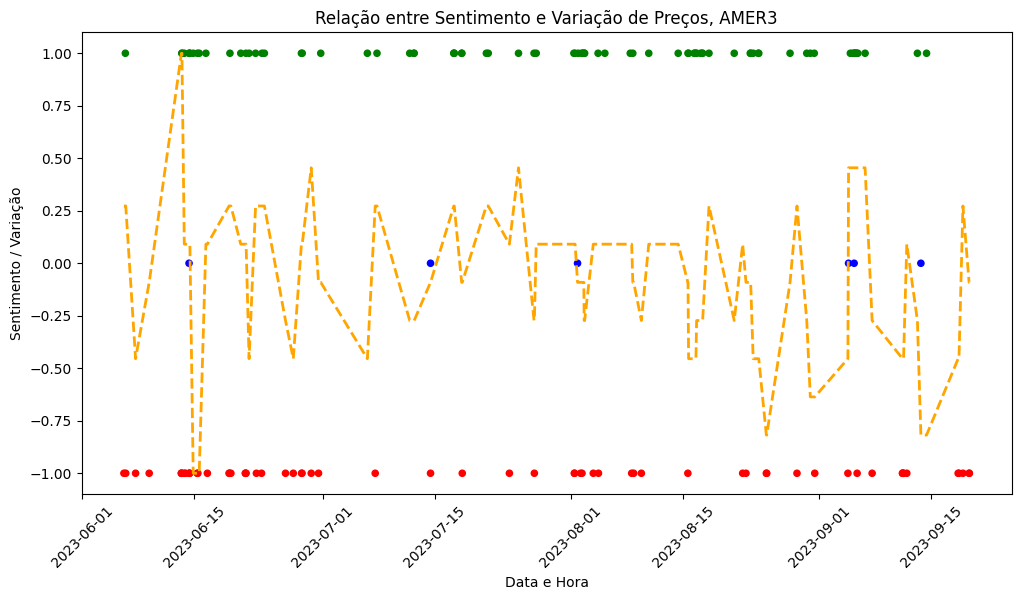

In [120]:
dados_analise = dados[['data_hora', 'sent_proc_3_texto', 'aberturaDiaAtual', 'fechamentoDiaAtual']]

dados_analise['data_hora'] = pd.to_datetime(dados_analise['data_hora'])

mapeamento_sentimentos = {'positivo': 1, 'neutro': 0, 'negativo': -1}

dados_analise['sent_proc_3'] = dados_analise['sent_proc_3_texto'].map(mapeamento_sentimentos)

scaler = MinMaxScaler(feature_range=(-1, 1))
dados_analise['variacao'] = dados_analise['fechamentoDiaAtual'] - dados_analise['aberturaDiaAtual']
dados_analise['variacao'] = scaler.fit_transform(dados_analise['variacao'].values.reshape(-1, 1))

plt.figure(figsize=(12, 6))

plt.scatter(dados_analise['data_hora'], dados_analise['sent_proc_3'], c=dados_analise['sent_proc_3'].map({1: 'green', 0: 'blue', -1: 'red'}), label='Sentimento', s=20)

plt.plot(dados_analise['data_hora'], dados_analise['variacao'], c='orange', label='Variação', linestyle='--', linewidth=2)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Positivo', markerfacecolor='green', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Neutro', markerfacecolor='blue', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Negativo', markerfacecolor='red', markersize=8)]


plt.xlabel('Data e Hora')
plt.ylabel('Sentimento / Variação')
plt.title(f'Relação entre Sentimento e Variação de Preços, {ativo}')

plt.xticks(rotation=45)
plt.show()

C:\Users\yonix42\AppData\Local\Temp\ipykernel_10596\2798412256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_analise['data_hora'] = pd.to_datetime(dados_analise['data_hora'])
C:\Users\yonix42\AppData\Local\Temp\ipykernel_10596\2798412256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_analise['variacao'] = dados_analise['aberturaDiaAtual'] - dados_analise['fechamentoDiaAtual']


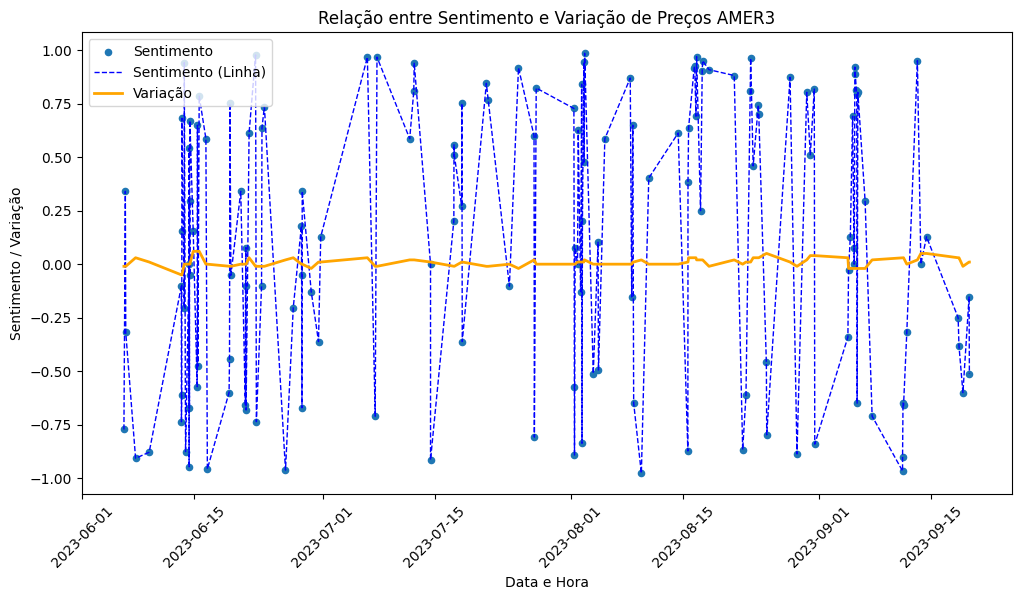

In [115]:
dados_analise = dados[['data_hora', 'sent_proc_3', 'aberturaDiaAtual', 'fechamentoDiaAtual']]

# Converta a coluna 'data_hora' para o tipo datetime, se já não estiver
dados_analise['data_hora'] = pd.to_datetime(dados_analise['data_hora'])
dados_analise['variacao'] = dados_analise['aberturaDiaAtual'] - dados_analise['fechamentoDiaAtual']

plt.figure(figsize=(12, 6))

# Plote os pontos usando 'sent_proc_3' como coordenada y
plt.scatter(dados_analise['data_hora'], dados_analise['sent_proc_3'], label='Sentimento', s=20)

# Plote uma linha pontilhada azul ligando os valores de 'sent_proc_3'
plt.plot(dados_analise['data_hora'], dados_analise['sent_proc_3'], c='blue', linestyle='--', label='Sentimento (Linha)', linewidth=1)

# Plote a variação no eixo y
plt.plot(dados_analise['data_hora'], dados_analise['variacao'], c='orange', label='Variação', linewidth=2)

plt.xlabel('Data e Hora')
plt.ylabel('Sentimento / Variação')
plt.title(f'Relação entre Sentimento e Variação de Preços {ativo}')

plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()